In [1]:

!pip install surprise

In [0]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
rating_elect = pd.read_csv("ratings_Electronics.csv",header=None)

In [5]:
rating_elect.shape

(7824482, 4)

In [6]:
rating_elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
0    object
1    object
2    float64
3    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
rating_elect.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
product_rating = pd.DataFrame(rating_elect.values,columns = ["user_id","product_id","rating","timestamp"])

In [9]:
product_rating.shape

(7824482, 4)

In [10]:
product_rating.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5,1365811200
1,A2CX7LUOHB2NDG,0321732944,5,1341100800
2,A2NWSAGRHCP8N5,0439886341,1,1367193600
3,A2WNBOD3WNDNKT,0439886341,3,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1,1334707200


In [0]:
product_rating.drop(columns = "timestamp",inplace =True,axis =1)

In [12]:
product_rating.head()

,user_id,product_id,rating
0,AKM1MP6P0OYPR,0132793040,5
1,A2CX7LUOHB2NDG,0321732944,5
2,A2NWSAGRHCP8N5,0439886341,1
3,A2WNBOD3WNDNKT,0439886341,3
4,A1GI0U4ZRJA8WN,0439886341,1


In [13]:
product_rating['user_id'].count()

7824482

In [0]:
fetching_users = product_rating.groupby(['user_id']).count()

In [15]:
product_rating.isnull().sum()

user_id       0
product_id    0
rating        0
dtype: int64

In [16]:
product_rating[product_rating["rating"].isnull()]

,user_id,product_id,rating


In [17]:
product_rating["rating"].unique()

array([5.0, 1.0, 3.0, 2.0, 4.0], dtype=object)

In [0]:
#product_rating[product_rating["product_id"] =='B']
#product_rating[product_rating["user_id"] =='A156XWKMCE31UT']
#print("Both ways it has only one value, so not possible to take mean and replace it. Anyhow we are gng to use only those user who have rated 50 or more ")

In [0]:
fetching_users.reset_index(inplace = True)

In [19]:
fetching_users.head()

,user_id,product_id,rating
0,A00000262KYZUE4J55XGL,1,1
1,A000063614T1OE0BUSKUT,2,2
2,A00009182QVLSWIGHLS1B,1,1
3,A00009661LC9LQPGKJ24G,1,1
4,A00010809P09NUU6ZP6H,1,1


In [0]:
fetched_user = fetching_users.loc[fetching_users["rating"]>=50]

In [21]:
type(fetched_user)

pandas.core.frame.DataFrame

In [0]:
rating_data = pd.merge(product_rating, fetched_user, on='user_id', how='inner')

In [0]:
rating_data.drop(columns = ["product_id_y","rating_y"],axis =1,inplace =True)

In [0]:
rating_data.columns = ['user_id', 'product_id', 'rating']

In [25]:
rating_data.head()

,user_id,product_id,rating
0,A3BY5KCNQZXV5U,0594451647,5
1,A3BY5KCNQZXV5U,B00000JD4V,4
2,A3BY5KCNQZXV5U,B000063574,5
3,A3BY5KCNQZXV5U,B0000CDJP8,5
4,A3BY5KCNQZXV5U,B0007Y794O,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60faa5db00>]],
      dtype=object)

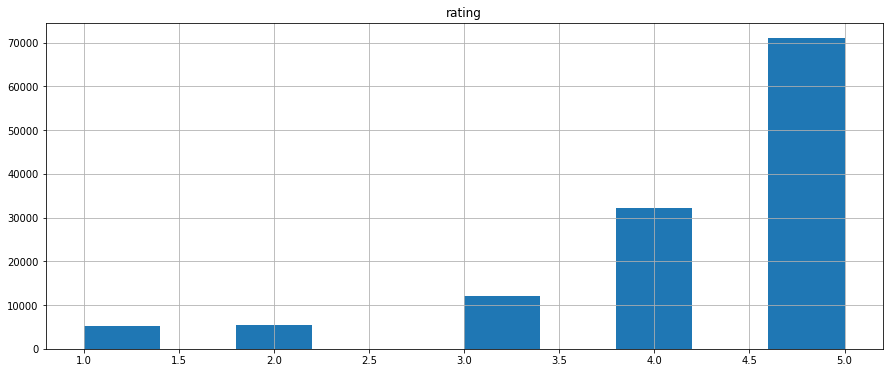

In [26]:
rating_data.rating = rating_data.rating.astype('int64') 
rating_data.hist(column="rating",grid = True,figsize = (15,6))
plt.show()

In [27]:
print("Popularity based Recommendation system")

Popularity based Recommendation system


In [28]:
rating_data.shape
print('\n')
len(rating_data["product_id"].unique())
print('\n')
len(rating_data["user_id"].unique())

(125871, 3)

48190

1540

In [0]:
#R_df = rating_data.pivot(index = 'user_id', columns ='product_id', values = 'rating').fillna(0)
#R_df.tail()

In [29]:
rating_data.groupby(by='product_id')['rating'].mean().sort_values(ascending=False).head(5)

product_id
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: rating, dtype: float64

In [30]:
print("Top 5 products has been recommended on all data")

Top 5 products has been recommended on all data


In [0]:
#Trying to do for train and test for popularity based model

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test = train_test_split(rating_data, test_size = 0.3, random_state = 1)

In [0]:
X_rating_value = X_train.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [0]:
X_rating_test_value = X_test.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [35]:
train_value = X_rating_value.reset_index(name = 'rating')
train_value.head()

,product_id,rating
0,0594451647,5.0
1,B0013HOW6M,5.0
2,B0013FFN12,5.0
3,B0050MM40C,5.0
4,B0050MX77G,5.0


In [36]:
test_value = X_rating_test_value.reset_index(name = 'rating')
test_value.head()

,product_id,rating
0,B00LKG1MC8,5.0
1,B002SNCOGA,5.0
2,B002SW3MP8,5.0
3,B002SVQJ1S,5.0
4,B002STGF6O,5.0


In [0]:
same_products = pd.merge(test_value, train_value, on='product_id', how='inner')

In [38]:
print("Finding simillar poducts found in both to get RMSE")

Finding simillar poducts found in both to get RMSE


In [39]:
same_products.head()

,product_id,rating_x,rating_y
0,B002SW3MP8,5.0,3.000000
1,B002SQKVE4,5.0,5.000000
2,B002SQKL7Q,5.0,4.818182
3,B002SQ9ZX2,5.0,5.000000
4,B002SP2X5U,5.0,2.000000


In [40]:
test_value[test_value["product_id"] == "B002SW3MP8"]#preicted 

,product_id,rating
2,B002SW3MP8,5.0


In [41]:
train_value[train_value["product_id"] == "B002SW3MP8"]#actual

,product_id,rating
32853,B002SW3MP8,3.0


In [0]:
from sklearn.metrics import mean_squared_error

In [43]:
print("RMSE value",np.sqrt(mean_squared_error(same_products["rating_y"],same_products["rating_x"])))

RMSE value 1.0987517295955944


In [44]:
print("Start of Build Collaborative Filtering model.")

Start of Build Collaborative Filtering model.


In [45]:
rating_data.shape

(125871, 3)

In [58]:
print("Tried with above 125871 records, got session crashed error, So minimizing my data set")
rating_data_colab = rating_data.iloc[0:10000]

Tried with above 125871 records, got session crashed error, So minimizing my data set


In [59]:
rating_data_colab.user_id=rating_data_colab.user_id.astype(str)
rating_data_colab.product_id=rating_data_colab.product_id.astype(str)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
#forcebiy converting to this format as pandas cannot read by surprise, as it is the interaction column

In [0]:
data = Dataset.load_from_df(rating_data_colab[['user_id', 'product_id', 'rating']], reader)

In [62]:
data

In [0]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)
#performance can be calcluated by comparing r hat value of rating and existing rating value, So it can be supervised learning
#Special case of supervised

In [64]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))
#An inner id is created, for every one user id and item id an inner id is created

A2JOPUWVV0XQJ3
B007NZGPAY


In [0]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [67]:
len(rating_data_colab["user_id"].unique())

87

In [68]:
len(rating_data_colab["product_id"].unique())

8104

In [69]:
print("Since we have less user we go for user based collbarative filtering")

Since we have less user we go for user based collbarative filtering


In [0]:
trainset_cv = trainset

In [0]:
testset_cv = testset

In [72]:
trainset_cv

In [0]:
from surprise.model_selection import GridSearchCV

In [0]:
param_grid = {'k': [1, 50],
              'sim_options': {'name': ['msd', 'cosine','pearson'],
                              'user_based': [False]}
             }

In [75]:
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
#grid search works only on data and not on subset train or test
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [76]:
print("using same for user based collbartive filtering")

using same for user based collbartive filtering


In [0]:
param_grid = {'k': [1, 50],
              'sim_options': {'name': ['msd', 'cosine','pearson'],
                              'user_based': [True]}
             }

In [78]:
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
#grid search works only on data and not on subset train or test
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [79]:
print("form the above results we can go ahead with User based collbrative filtering as the computation was fast with less no. of user compared with item")
print("RMSE error also looks less with optimal k value = 50")

form the above results we can go ahead with User based collbrative filtering as the computation was fast with less no. of user compared with item
RMSE error also looks less with optimal k value = 50


In [80]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})
algo.fit(trainset)
# correlated rating takes, these many nieghbours from K 
# optimal k value can be found, use pearson correlation 

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [81]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)



RMSE: 1.1281


1.128099659914071

In [82]:
test_pred[:2]
##est values is the predicted rating, r_ui is the rating already found.Was impossible false represents data found in train and test, K = 0 refers actual k , it means no nearest neighbours picked for computation
##if no value found from test in train then popularity based rating happens on est of test data and was_impossible will be true

[Prediction(uid='A328GLDSDNFYII', iid='B0054L8N7M', r_ui=4.0, est=4.209142857142857, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ADLVFFE4VBT8', iid='B003ES5ZR8', r_ui=5.0, est=4.209142857142857, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})]

In [0]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [0]:
predictions_df.columns = ["user_id","product_id","est_rating"]
predictions_df.sort_values(by = ["user_id","est_rating",],ascending=False,inplace=True)

In [85]:
predictions_df[:5]

,user_id,product_id,est_rating
106,AZ515FFZ7I2P7,B001CHHVCU,4.27551
284,AZ515FFZ7I2P7,B002R5AM7C,4.27551
639,AZ515FFZ7I2P7,B004CQMC5Y,4.27551
655,AZ515FFZ7I2P7,B001RB1QWW,4.27551
874,AZ515FFZ7I2P7,B001S4OTS6,4.27551


In [86]:
predictions_df.head(20)

,user_id,product_id,est_rating
106,AZ515FFZ7I2P7,B001CHHVCU,4.275510
284,AZ515FFZ7I2P7,B002R5AM7C,4.275510
639,AZ515FFZ7I2P7,B004CQMC5Y,4.275510
655,AZ515FFZ7I2P7,B001RB1QWW,4.275510
874,AZ515FFZ7I2P7,B001S4OTS6,4.275510
1156,AZ515FFZ7I2P7,B004BQTTE2,4.275510
1298,AZ515FFZ7I2P7,B005YQY5TM,4.275510
1421,AZ515FFZ7I2P7,B004G8QO8E,4.275510
1577,AZ515FFZ7I2P7,B001DULYZG,4.275510
2191,AZ515FFZ7I2P7,B00004ZC8Y,4.275510


In [0]:
def get_top_five(user_id):
  return predictions_df[predictions_df["user_id"]==user_id].head()

In [89]:
get_top_five('AZ515FFZ7I2P7')

,user_id,product_id,est_rating
106,AZ515FFZ7I2P7,B001CHHVCU,4.27551
284,AZ515FFZ7I2P7,B002R5AM7C,4.27551
639,AZ515FFZ7I2P7,B004CQMC5Y,4.27551
655,AZ515FFZ7I2P7,B001RB1QWW,4.27551
874,AZ515FFZ7I2P7,B001S4OTS6,4.27551


In [0]:
top_5_recos = predictions_df.groupby("user_id").head(5).reset_index(drop=True)

In [91]:
top_5_recos

,user_id,product_id,est_rating
0,AZ515FFZ7I2P7,B001CHHVCU,4.275510
1,AZ515FFZ7I2P7,B002R5AM7C,4.275510
2,AZ515FFZ7I2P7,B004CQMC5Y,4.275510
3,AZ515FFZ7I2P7,B001RB1QWW,4.275510
4,AZ515FFZ7I2P7,B001S4OTS6,4.275510
5,AW3LX47IHPFRL,B008D9MU0S,4.209143
6,AW3LX47IHPFRL,B00AA6OVAO,4.209143
7,AW3LX47IHPFRL,B000WG6XW6,4.209143
8,AW3LX47IHPFRL,B008DZ2YT4,4.209143
9,AW3LX47IHPFRL,B0015AE4C4,4.209143


In [0]:
#Note:-
#Could you please guide me over the points,
#1.need undersanding over why we RMSE on popularity based, In case colabrative we recommend to user based on what rating he can provide and from est and actual.
#but dint understand over Popularity based as it is mean of the rating, even if we split test and train in what way it can help, may be a scenario could help understanding.
#2.could you please let me know any other library directly can be used for popularity, I tired with graph lab, but its installation is like key generation